# **Image Denoising with Denoising Autoencoders**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from skimage.metrics import peak_signal_noise_ratio as psnr

In [ ]:
# Load and prepare the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:

# Build the Denoising Autoencoder model
input_img = Input(shape=(28, 28, 1))

In [ ]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)



In [ ]:
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the model
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 569ms/step - loss: 0.1164 - val_loss: 0.1134
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 576ms/step - loss: 0.1123 - val_loss: 0.1092
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 562ms/step - loss: 0.1093 - val_loss: 0.1065
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 555ms/step - loss: 0.1070 - val_loss: 0.1045
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 571ms/step - loss: 0.1055 - val_loss: 0.1036
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step


In [ ]:

# Denoise the images
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


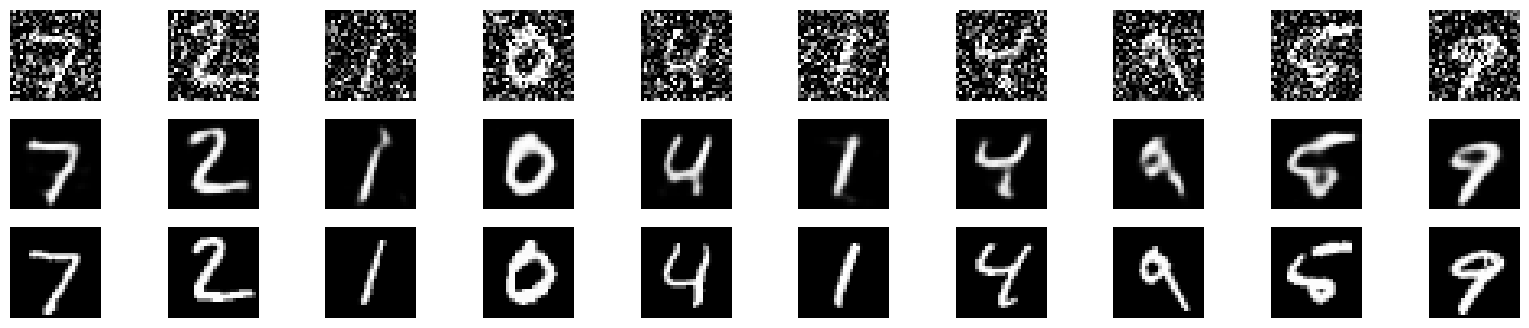

In [ ]:
# Visualize results
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Display original clean images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
# Calculate PSNR for performance evaluation
psnr_values = [psnr(x_test[i], decoded_imgs[i]) for i in range(len(x_test))]
print(f"Average PSNR: {np.mean(psnr_values):.2f}")

Average PSNR: 19.06
